# Sparse effects analysis

We run a little extra benchmark where only part of the treatment samples is truly affected by the condition

Parameters:
- p=5
- n=(20+20)
- N: 5000
- Base abundance of affected ct: (1, 100, 1000)
- Increase: (500, 1000, 2000)
- Share of affected case samples: (0.2, 0.4, 0.6, 0.8, 1)
- repetitions: 20

In [1]:
# Setup
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import anndata as ad
import numpy as np
import os
import pickle as pkl
from statsmodels.stats.multitest import multipletests

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Read data.
save_path = "../../../zenodo_data_rv2/sccoda_benchmark_data/heterogeneous_response_benchmark/"

results = pd.read_csv(save_path + "benchmark_results", index_col=0)

In [7]:
print(results.head(5))

   n_cell_types  n_cells  n_controls  n_cases  sparsity_level  Base  Increase  \
0             5     5000          20       20            0.85     1      2000   
1             5     5000          20       20            0.85     1      2000   
2             5     5000          20       20            0.85     1      2000   
3             5     5000          20       20            0.85     1      2000   
4             5     5000          20       20            0.85     1      2000   

                      log-fold increase  \
0  [-8.517 -1.386 -1.386 -1.386 -1.386]   
1  [-8.517 -1.386 -1.386 -1.386 -1.386]   
2  [-8.517 -1.386 -1.386 -1.386 -1.386]   
3  [-8.517 -1.386 -1.386 -1.386 -1.386]   
4  [-8.517 -1.386 -1.386 -1.386 -1.386]   

                                         b_true  w_true  ...  fn   model  tpr  \
0  [array([8.112, 0.   , 0.   , 0.   , 0.   ])]     NaN  ...   0  scCODA  1.0   
1  [array([8.112, 0.   , 0.   , 0.   , 0.   ])]     NaN  ...   0  scCODA  1.0   
2  [array([

In [8]:
rt = results.groupby(["sparsity_level", "Base", "Increase"]).agg({
    "tpr": "mean",
    "tnr": "mean",
    "precision": "mean",
    "fdr": "mean",
    "accuracy": "mean",
    "f1_score": "mean",
    "mcc": "mean",
})
print(rt)

                               tpr     tnr  precision       fdr  accuracy  \
sparsity_level Base Increase                                                
0.05           1    500       0.00  1.0000   0.000000  0.000000      0.80   
                    1000      0.00  1.0000   0.000000  0.000000      0.80   
                    2000      0.05  0.9750   0.025000  0.075000      0.79   
               100  500       0.05  0.9625   0.016667  0.083333      0.78   
                    1000      0.00  1.0000   0.000000  0.000000      0.80   
...                            ...     ...        ...       ...       ...   
1.00           100  1000      1.00  0.9875   0.975000  0.025000      0.99   
                    2000      1.00  1.0000   1.000000  0.000000      1.00   
               1000 500       1.00  0.9625   0.925000  0.075000      0.97   
                    1000      1.00  0.9500   0.916667  0.083333      0.96   
                    2000      1.00  0.9875   0.975000  0.025000      0.99   

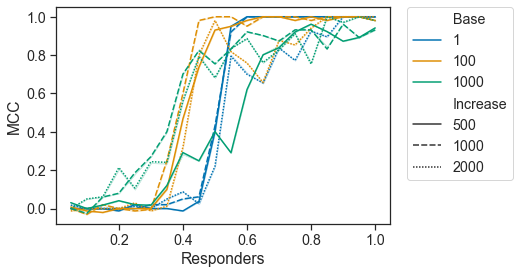

In [9]:
sns.set(style="ticks", font_scale=1.3)

g = sns.lineplot(data=results, x="sparsity_level", y="mcc",
                hue="Base",
                palette="colorblind",
                style="Increase",
                ci=False
            )

g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Responders")
plt.ylabel("MCC")

# plt.savefig("../../../other_data/sparsity_test/responder_share_test.png", format="png", bbox_inches="tight")
# plt.savefig("../../../other_data/sparsity_test/responder_share_test.svg", format="svg", bbox_inches="tight")
# plt.savefig("../../../other_data/sparsity_test/responder_share_test.pdf", format="pdf", bbox_inches="tight")

plt.show()

## check on the data (how many samples have >5 IAFs?)

In [10]:
# read data
data_smillie_lp = ad.read_h5ad("../../../sccoda_benchmark_data/smillie_lp.h5ad")

In [11]:
dat_iaf = data_smillie_lp.obs
dat_iaf["IAF"] = data_smillie_lp[:, "Inflammatory Fibroblasts"].X
dat_iaf.groupby("Health").count()

,Subject,Location,Replicate,IAF
Health,,,,
Healthy,24,24,24,24
Inflamed,24,24,24,24
Non-inflamed,24,24,24,24


In [12]:
dat_iaf[dat_iaf["IAF"] >5].groupby("Health").count()

,Subject,Location,Replicate,IAF
Health,,,,
Healthy,0,0,0,0
Inflamed,13,13,13,13
Non-inflamed,10,10,10,10


In [13]:
print(10/24)
print(13/24)

0.4166666666666667
0.5416666666666666
